In [ ]:
import pandas as pd # to read data set
import numpy as np # to perform numeric operation
import matplotlib.pyplot as plt # for Visualization
import seaborn as sns # Advance Visualization

In [ ]:
from google.colab import drive # Accessing DataSet from Google Drive
drive.mount('/content/gdrive') # Drive Mount Authorization

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df_eda=pd.read_csv('/content/gdrive/My Drive/Co_data.csv',encoding='latin1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_eda.head()

member_id   loan_amnt   ... tot_colle_amt tot_curr_bal
0    58189336       14350  ...           0.0      28699.0
1    70011223        4800  ...           0.0       9974.0
2    70255675       10000  ...          65.0      38295.0
3     1893936       15000  ...           0.0      55564.0
4     7652106       16000  ...           0.0      47159.0

[5 rows x 36 columns]

In [ ]:
df_eda.shape

(887379, 36)

In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   member_id                    887379 non-null  int64  
 1   loan_amnt                    887379 non-null  int64  
 2   terms                        887379 non-null  object 
 3   batch_ID                     756631 non-null  object 
 4   Rate_of_intrst               887379 non-null  float64
 5   grade                        887379 non-null  object 
 6   sub_grade                    887379 non-null  object 
 7   Emp_designation              835917 non-null  object 
 8   Experience                   842554 non-null  object 
 9   home_ownership               887379 non-null  object 
 10  annual_inc                   887375 non-null  float64
 11  verification_status          887379 non-null  object 
 12  purpose                      887379 non-null  object 
 13 

In [ ]:
df_eda.columns

Index(['member_id ', 'loan_amnt ', 'terms', 'batch_ID ', 'Rate_of_intrst',
       'grade', 'sub_grade', 'Emp_designation', 'Experience', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose', 'State',
       'debt_income_ratio', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'numb_credit',
       'pub_rec', 'total revol_bal', 'total_credits', 'initial_list_status',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type',
       'verification_status_joint', 'last_week_pay', 'acc_now_delinq',
       'tot_colle_amt', 'tot_curr_bal'],
      dtype='object')

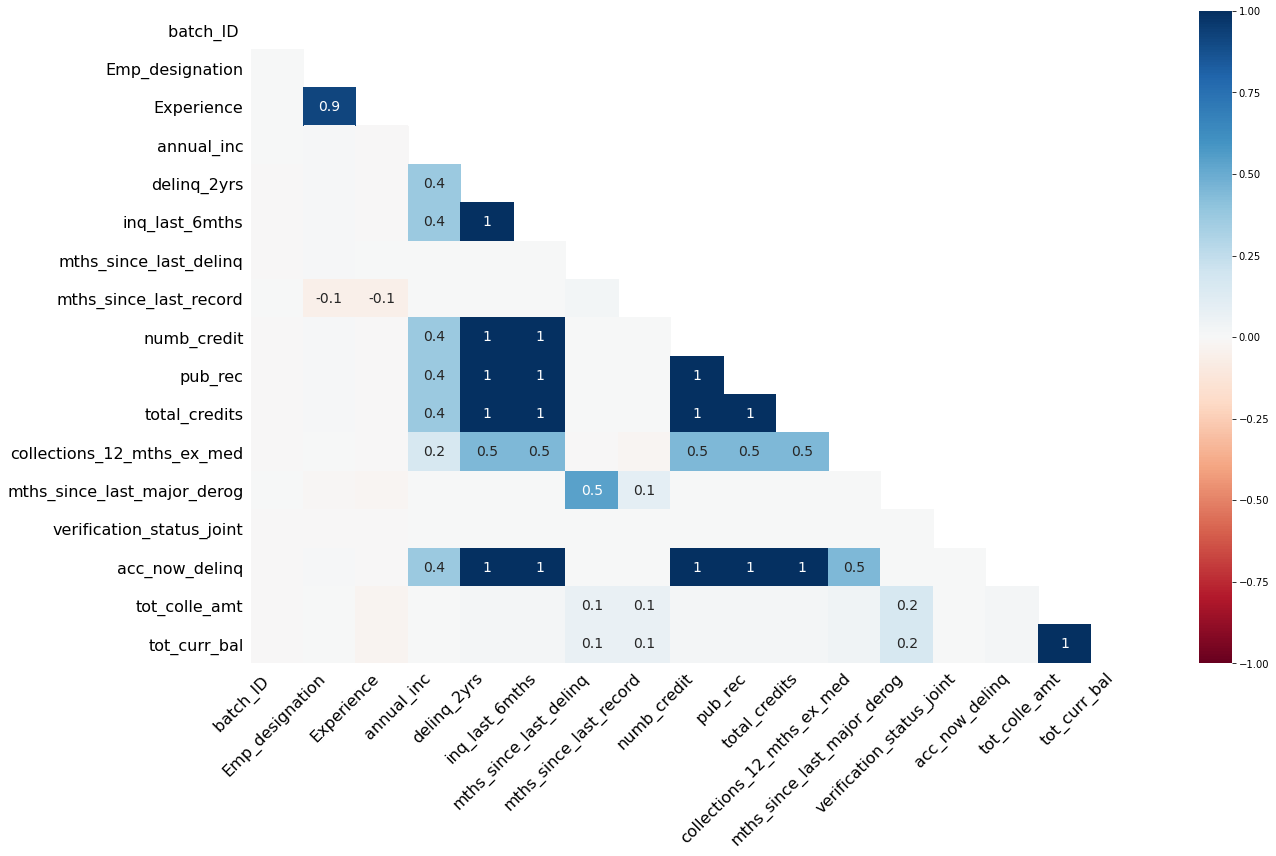

In [ ]:
import missingno as msno
msno.heatmap(df_eda)

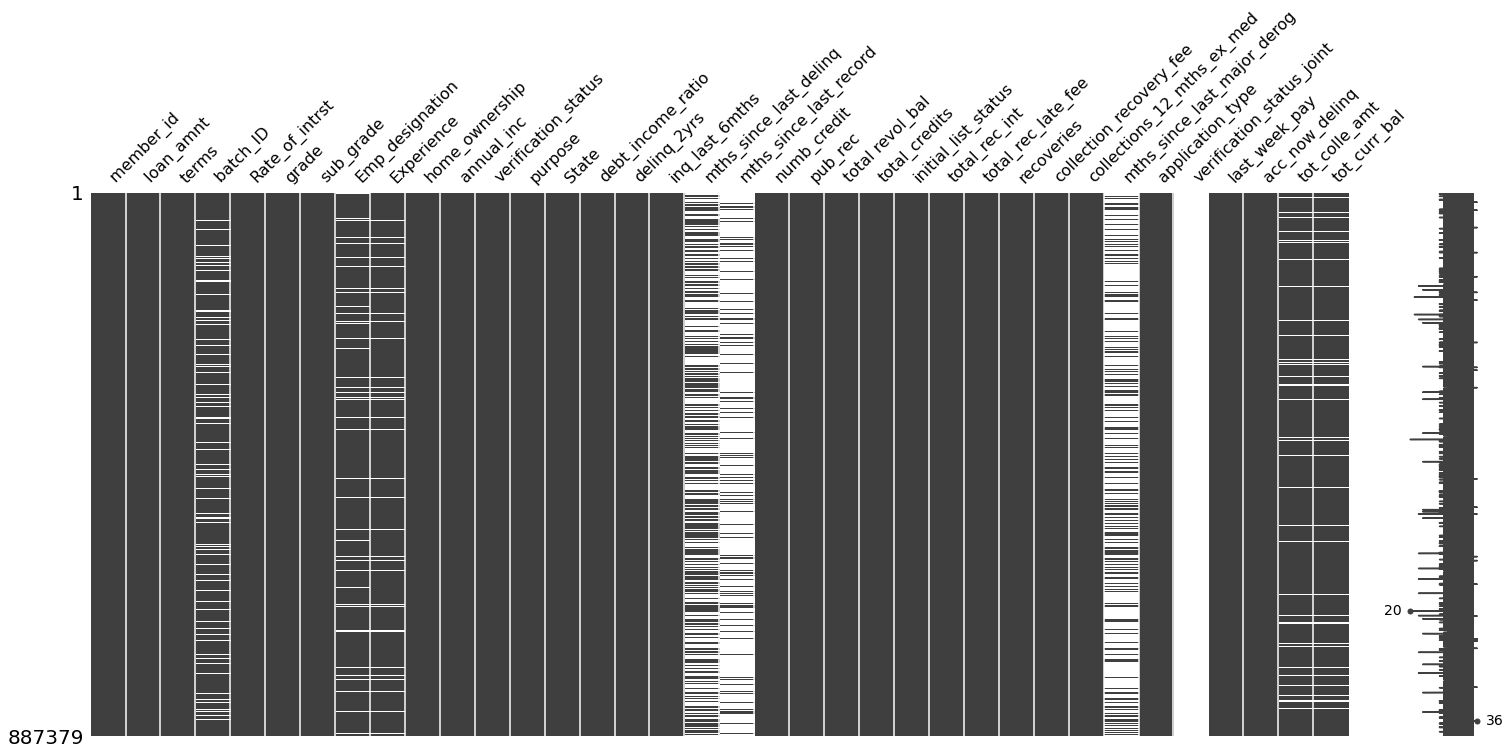

In [ ]:
msno.matrix(df_eda)

Text(0.5, 1.0, 'Grade')

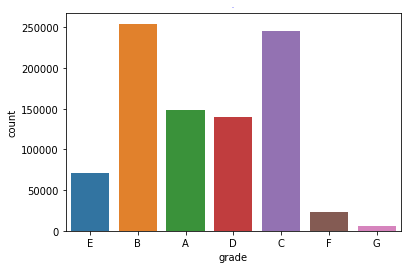

In [ ]:
sns.countplot(df_eda.grade)
plt.title("Grade" ,color = 'blue',fontsize=1)

In [ ]:
df_eda = df_eda.drop(columns=['member_id ','batch_ID ','mths_since_last_delinq','mths_since_last_record','mths_since_last_major_derog','verification_status_joint'],axis=1)

In [ ]:
df_eda.columns

Index(['loan_amnt ', 'terms', 'Rate_of_intrst', 'grade', 'sub_grade',
       'Emp_designation', 'Experience', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'State', 'debt_income_ratio',
       'delinq_2yrs', 'inq_last_6mths', 'numb_credit', 'pub_rec',
       'total revol_bal', 'total_credits', 'initial_list_status',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'collections_12_mths_ex_med',
       'application_type', 'last_week_pay', 'acc_now_delinq', 'tot_colle_amt',
       'tot_curr_bal'],
      dtype='object')

In [ ]:
catgor1 = [colmn for colmn in df_eda.columns if df_eda[colmn].dtypes == 'O']
catgor1

['terms',
 'grade',
 'sub_grade',
 'Emp_designation',
 'Experience',
 'home_ownership',
 'verification_status',
 'purpose',
 'State',
 'initial_list_status',
 'application_type',
 'last_week_pay']

In [ ]:
df_eda = df_eda.drop(columns=catgor1,axis=1)

In [ ]:
df_eda.shape

(887379, 18)

In [ ]:
df_eda.columns

Index(['loan_amnt ', 'Rate_of_intrst', 'annual_inc', 'debt_income_ratio',
       'delinq_2yrs', 'inq_last_6mths', 'numb_credit', 'pub_rec',
       'total revol_bal', 'total_credits', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_colle_amt',
       'tot_curr_bal'],
      dtype='object')

In [ ]:
df_eda.collections_12_mths_ex_med = df_eda.collections_12_mths_ex_med.fillna(df_eda.collections_12_mths_ex_med.mean())
#df_eda.mths_since_last_major_derog = df_eda.mths_since_last_major_derog.fillna(df_eda.mths_since_last_major_derog.mean())
#df_eda.Experience = df_eda.Experience.fillna(df_eda.Experience.mean())
df_eda.delinq_2yrs = df_eda.delinq_2yrs.fillna(df_eda.delinq_2yrs.mean())
df_eda.inq_last_6mths = df_eda.inq_last_6mths.fillna(df_eda.inq_last_6mths.mean())
#df_eda.mths_since_last_delinq = df_eda.mths_since_last_delinq.fillna(df_eda.mths_since_last_delinq.mean())
#df_eda.mths_since_last_record = df_eda.mths_since_last_record.fillna(df_eda.mths_since_last_record.mean())
df_eda.numb_credit = df_eda.numb_credit.fillna(df_eda.numb_credit.mean())
df_eda.total_credits = df_eda.total_credits.fillna(df_eda.total_credits.mean())
df_eda.tot_colle_amt = df_eda.tot_colle_amt.fillna(df_eda.tot_colle_amt.mean())
df_eda.tot_curr_bal = df_eda.tot_curr_bal.fillna(df_eda.tot_curr_bal.mean())
df_eda.pub_rec  = df_eda.pub_rec.fillna(df_eda.pub_rec.mean())
df_eda.acc_now_delinq  = df_eda.acc_now_delinq.fillna(df_eda.acc_now_delinq.mean())
#df_eda.last_week_pay  = df_eda.last_week_pay.fillna(df_eda.last_week_pay.mean())
df_eda.annual_inc = df_eda.annual_inc.fillna(df_eda.annual_inc.mean())

In [ ]:
df_eda.dropna(how='any',axis=0)

loan_amnt   Rate_of_intrst  ...  tot_colle_amt   tot_curr_bal
0            14350           19.19  ...        0.00000   28699.000000
1             4800           10.99  ...        0.00000    9974.000000
2            10000            7.26  ...       65.00000   38295.000000
3            15000           19.72  ...        0.00000   55564.000000
4            16000           10.64  ...        0.00000   47159.000000
...            ...             ...  ...            ...            ...
887374       15000            6.49  ...        0.00000  143920.000000
887375       35000           25.89  ...        0.00000  772713.000000
887376       14000           17.51  ...      225.70261  139458.189336
887377       20000            7.26  ...        0.00000  291998.000000
887378        2700            7.49  ...      225.70261  139458.189336

[887379 rows x 18 columns]

In [ ]:
df_eda.describe()

loan_amnt   Rate_of_intrst  ...  tot_colle_amt  tot_curr_bal
count  887379.000000   887379.000000  ...   8.873790e+05  8.873790e+05
mean    14755.264605       13.246740  ...   2.257026e+02  1.394582e+05
std      8435.455601        4.381867  ...   9.894641e+03  1.475363e+05
min       500.000000        5.320000  ...   0.000000e+00  0.000000e+00
25%      8000.000000        9.990000  ...   0.000000e+00  3.224600e+04
50%     13000.000000       12.990000  ...   0.000000e+00  1.000890e+05
75%     20000.000000       16.200000  ...   0.000000e+00  1.957940e+05
max     35000.000000       28.990000  ...   9.152545e+06  8.000078e+06

[8 rows x 18 columns]

In [ ]:
df_eda=(df_eda-df_eda.min())/(df_eda.max()-df_eda.min())

Text(0.5, 1.0, 'Cor HeatMap')

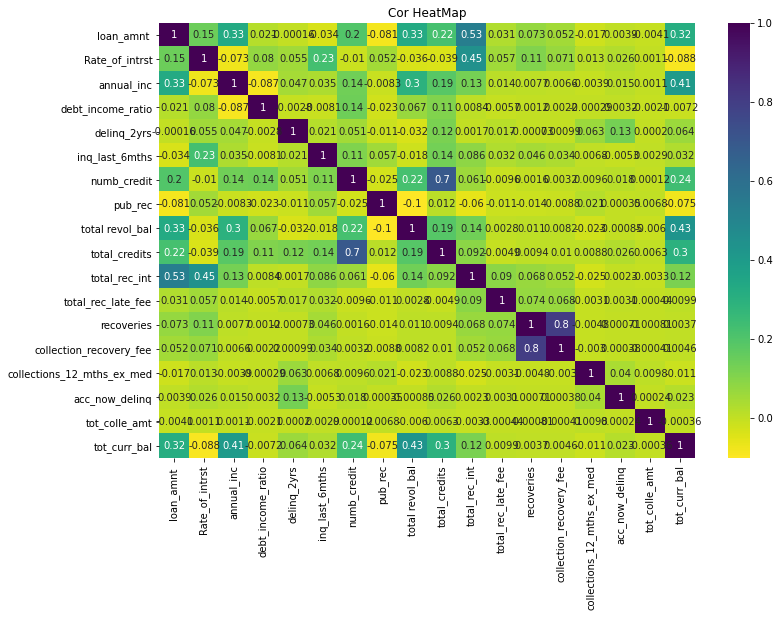

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_eda.corr(),annot = True, cmap='viridis_r')
plt.title("Cor HeatMap")

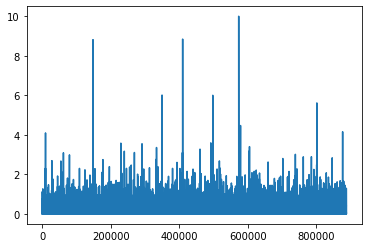

In [ ]:
from sklearn.preprocessing import scale
from sklearn import preprocessing
revolv_matrix = df_eda['total revol_bal'].values.reshape(-1,1)
scaled = preprocessing.MinMaxScaler(feature_range=(0,10))
scaled_revolv = scaled.fit_transform(revolv_matrix)
plt.plot(scaled_revolv)

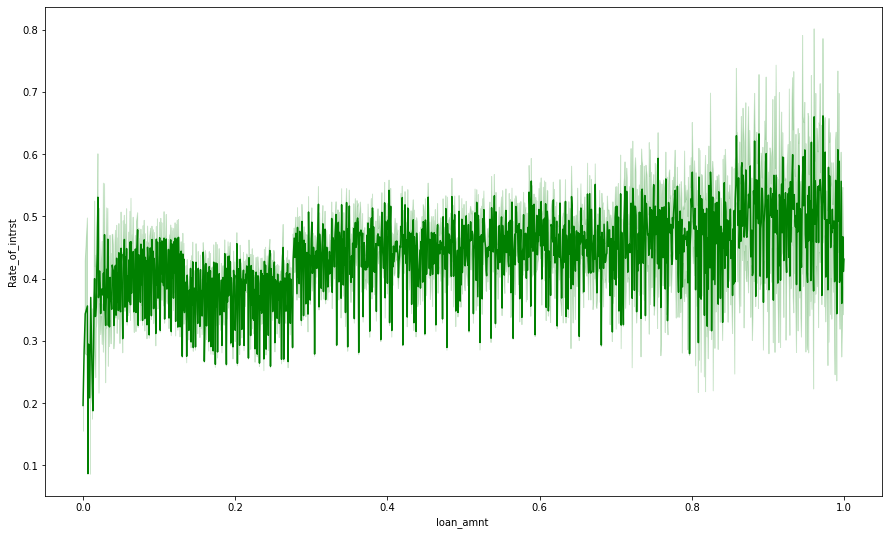

In [ ]:
plt.figure(figsize=(15,9))
sns.lineplot(df_eda['loan_amnt '], df_eda['Rate_of_intrst'], color="g")

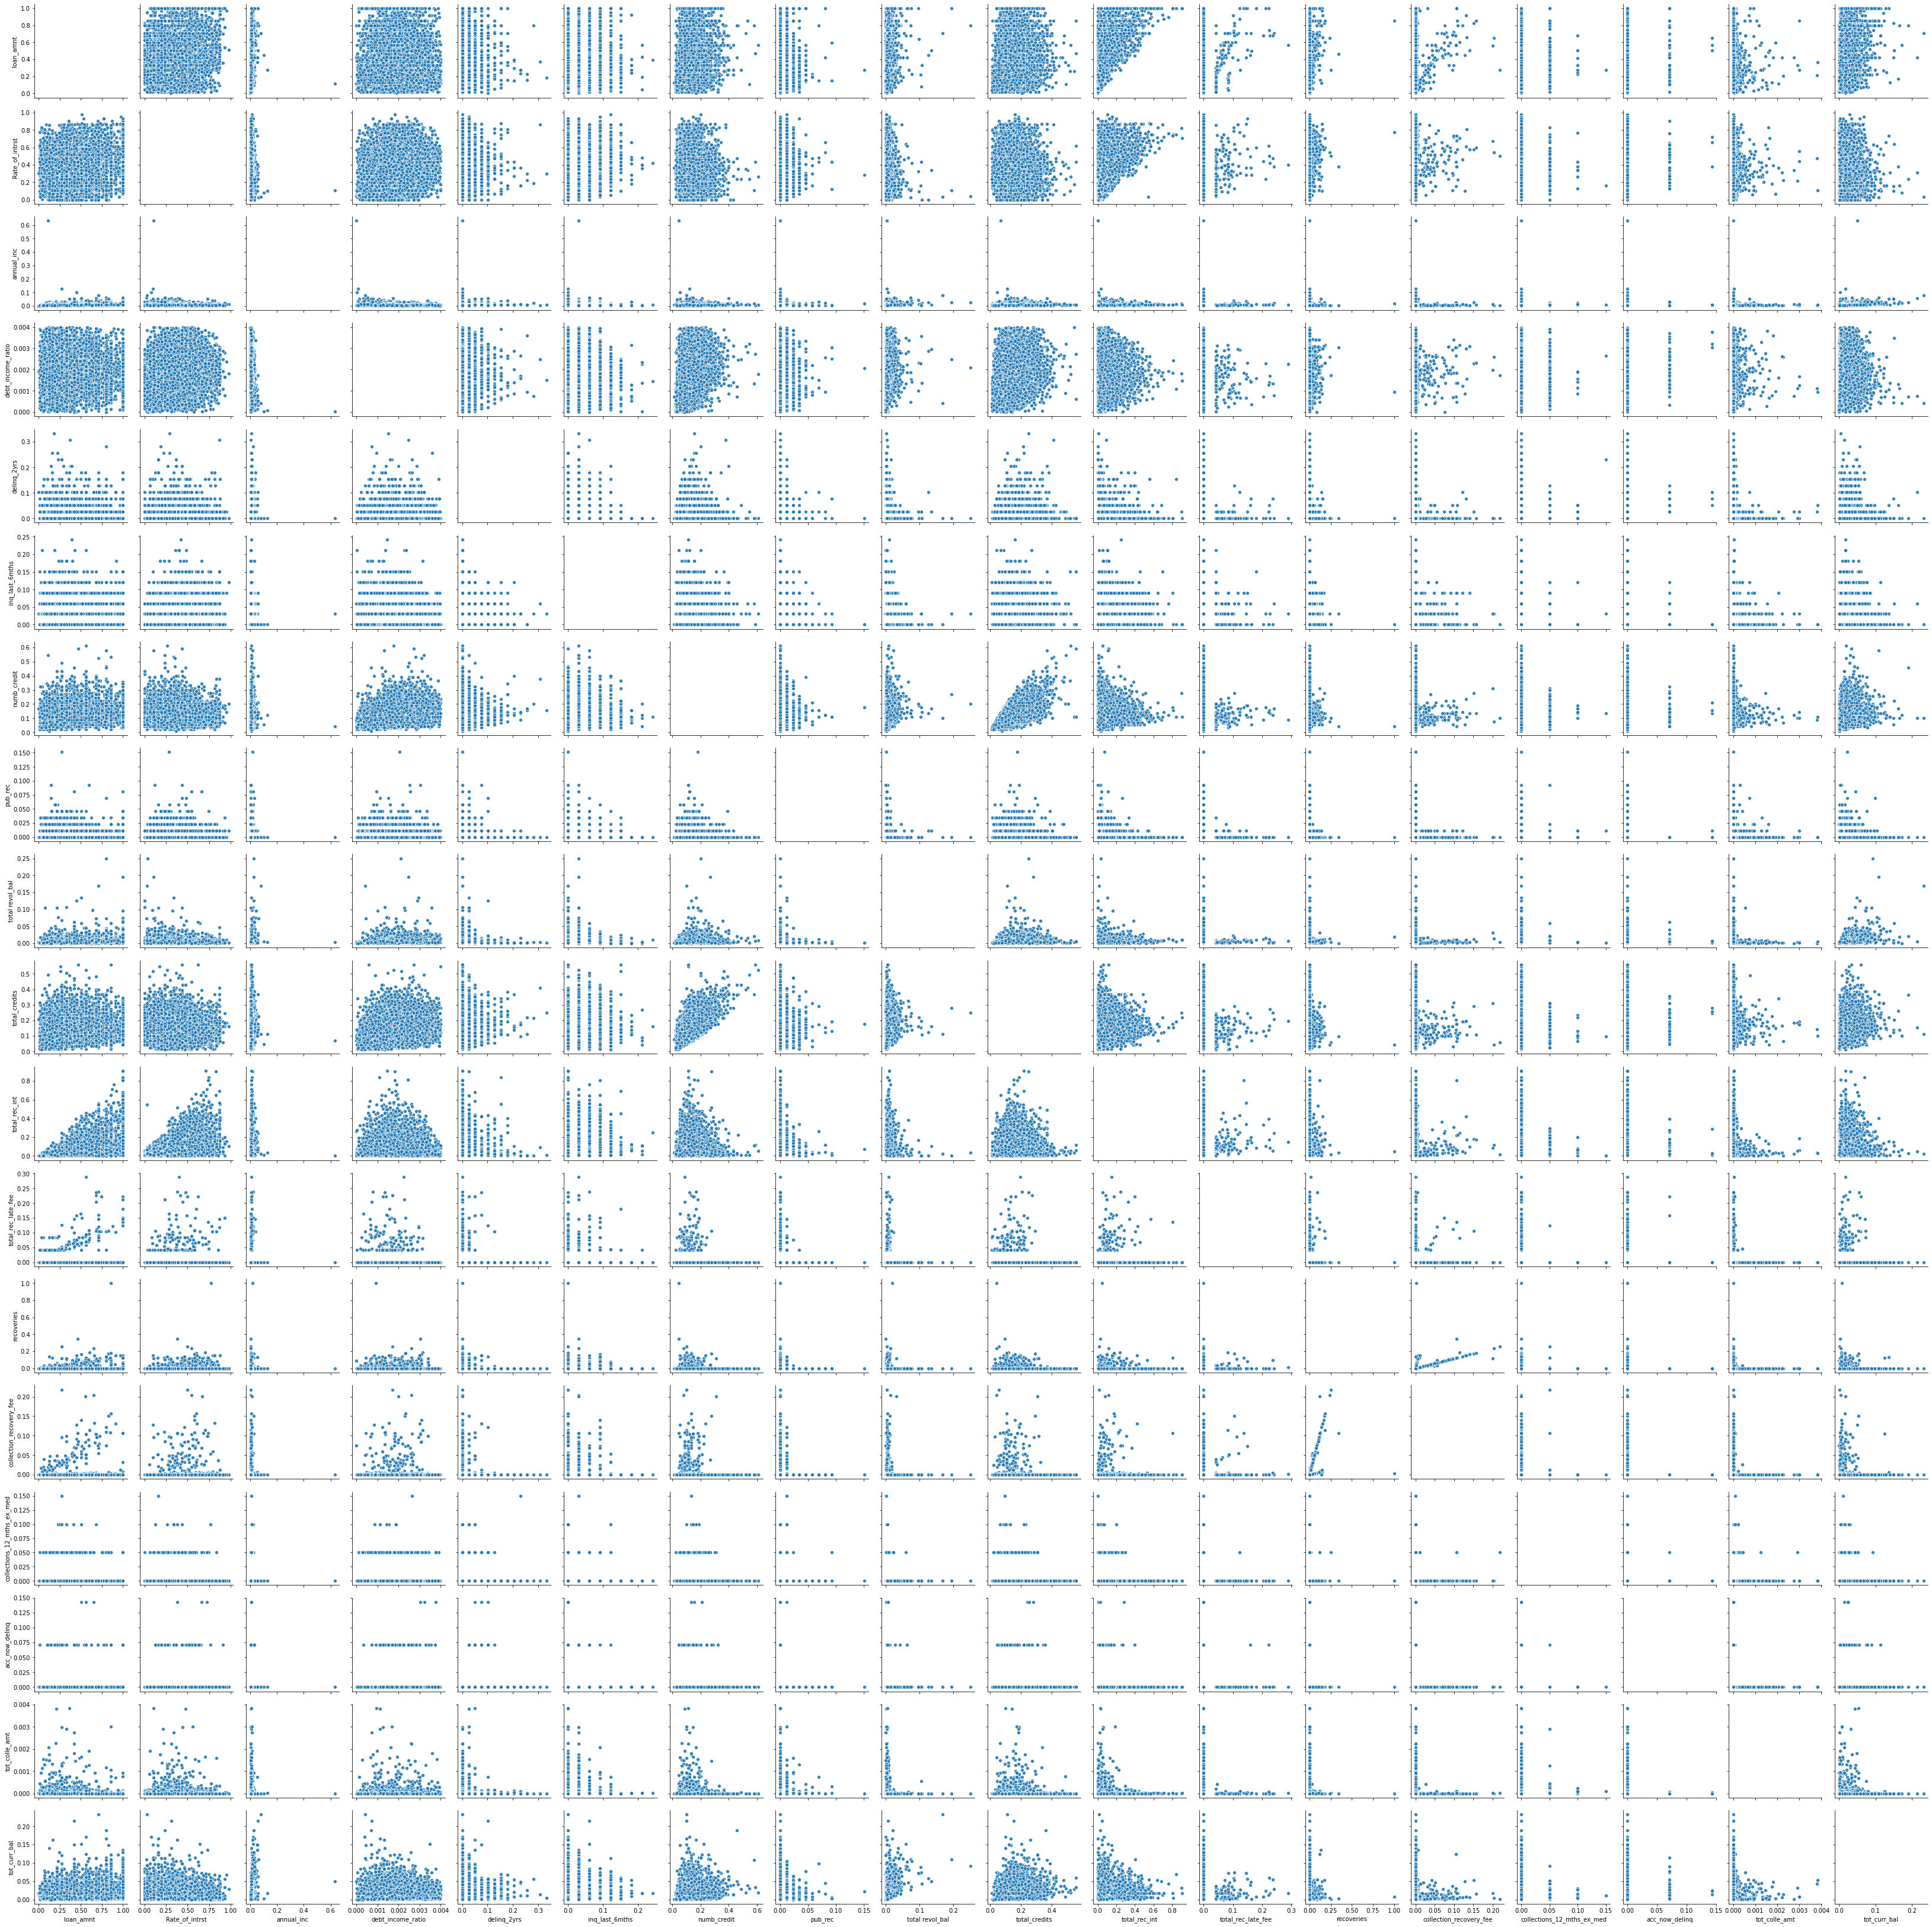

In [ ]:
sns.pairplot(data=df_eda.sample(frac=.009), plot_kws={'alpha': .9}, diag_kind='scatter', kind='scatter')

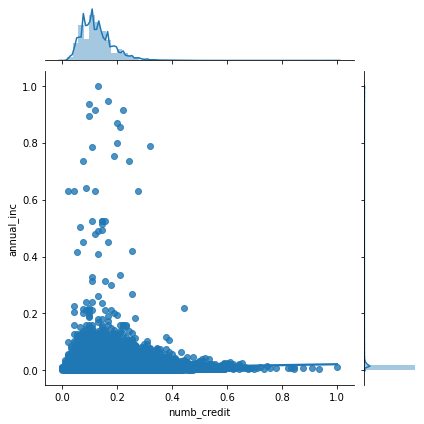

In [ ]:
sns.jointplot(x='numb_credit',y='annual_inc',data=df_eda,kind='reg')

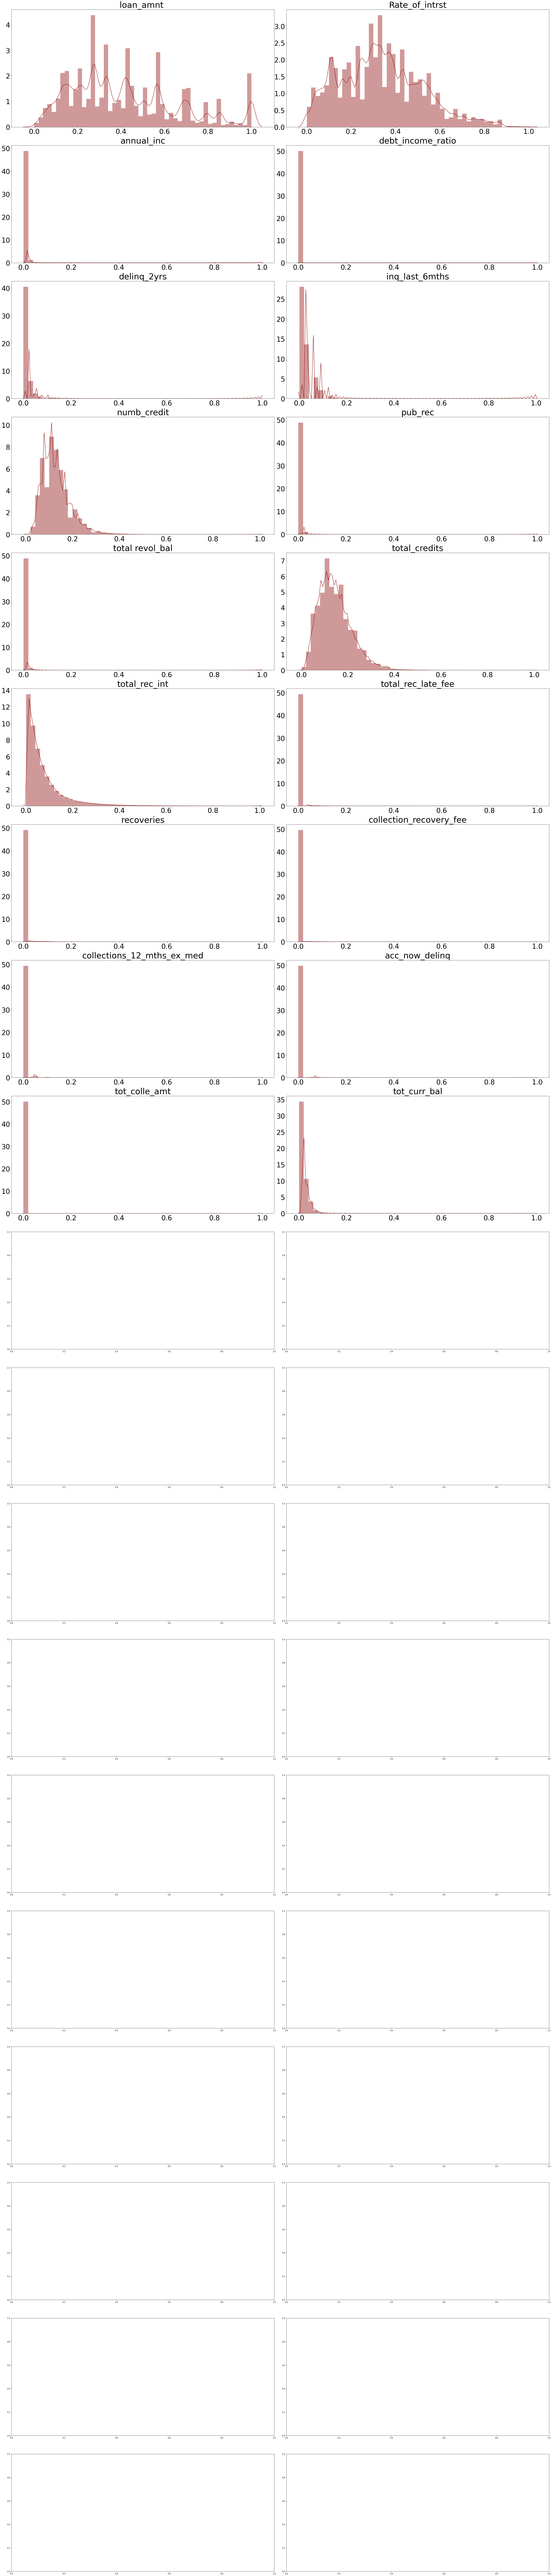

In [ ]:
'''Plot histogram of numerical variables to validate pandas intuition.'''
fig, axes = plt.subplots(nrows = 19, ncols = 2, figsize = (40, 200))
for ax, column in zip(axes.flatten(), df_eda.columns):
    sns.distplot(df_eda[column], ax = ax, color = 'darkred')
    ax.set_title(column, fontsize = 43)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
    ax.set_xlabel('')
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

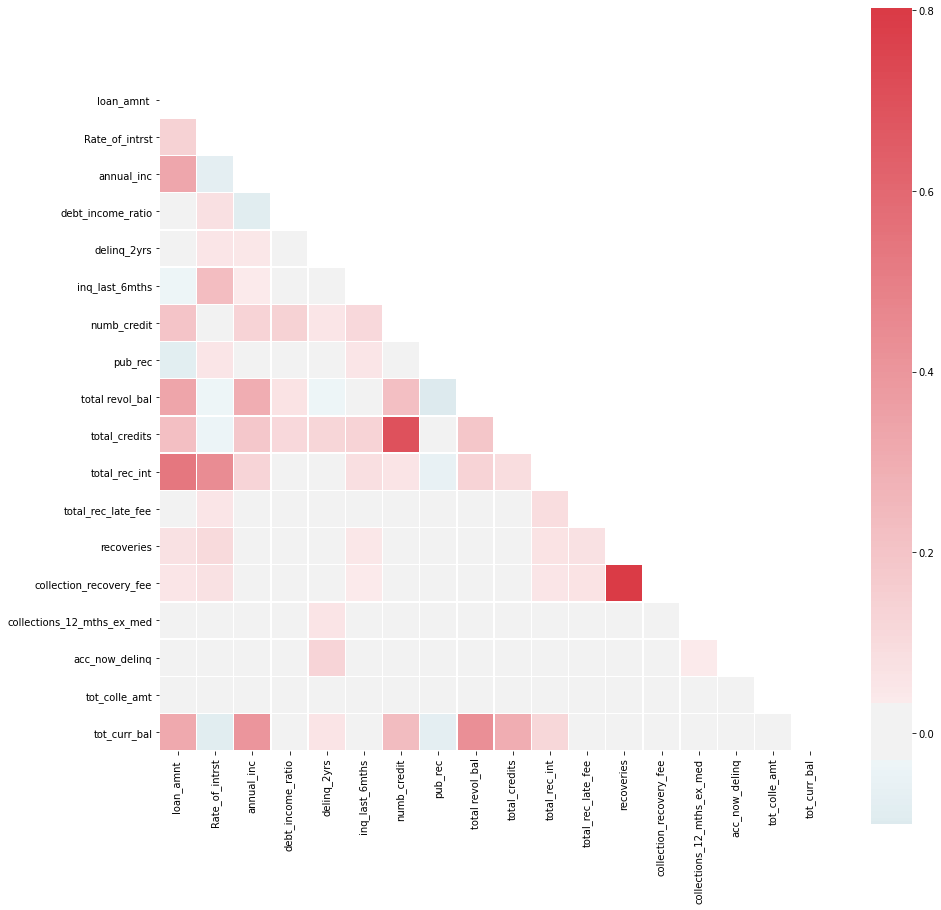

In [ ]:
corr = df_eda.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap,
            center=0, square=True, linewidths = .5)
plt.show()


 mu = 0.01 and sigma = 0.01



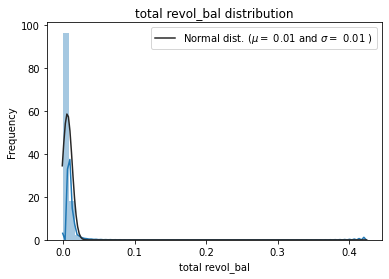

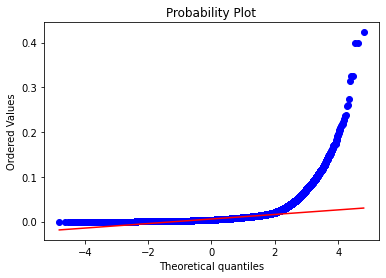

Skewness: 7.990288
Kurtosis: 160.277841


In [ ]:
from scipy.stats import norm
from scipy import stats
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df_eda["total revol_bal"] = np.log1p(df_eda["total revol_bal"])

#Check the new distribution 
sns.distplot(df_eda['total revol_bal'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_eda['total revol_bal'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('total revol_bal distribution')

fig = plt.figure()
res = stats.probplot(df_eda['total revol_bal'], plot=plt)
plt.show()

y__train = df_eda['total revol_bal'].values

print("Skewness: %f" % df_eda['total revol_bal'].skew())
print("Kurtosis: %f" % df_eda['total revol_bal'].kurt())

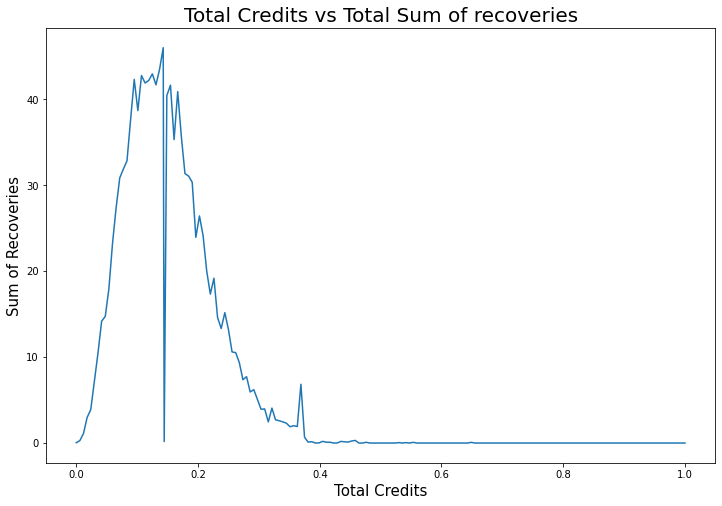

In [ ]:
plt.figure(figsize = (12,8))

df_eda.groupby('total_credits')['recoveries'].sum().plot()
plt.title("Total Credits vs Total Sum of recoveries", fontsize=20)
plt.xlabel("Total Credits", fontsize=15)
plt.ylabel("Sum of Recoveries", fontsize=15)
plt.show()

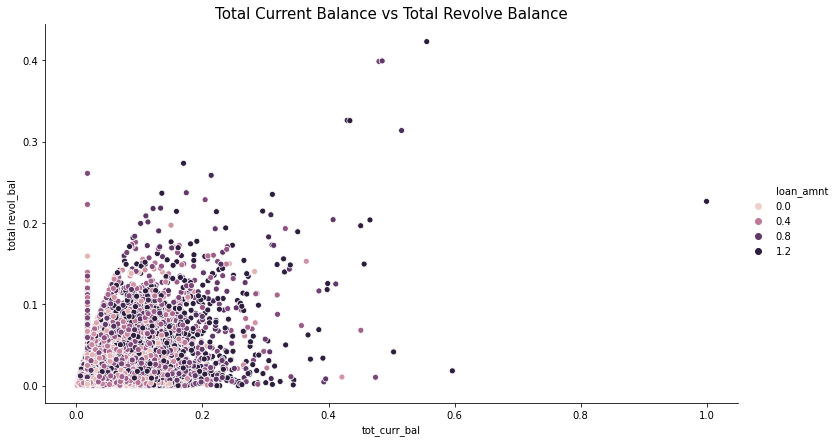

In [ ]:
sns.relplot(data = df_eda, kind = "scatter",x = "tot_curr_bal",y = "total revol_bal",
            hue = 'loan_amnt ',height=6 ,aspect = 1.75,)
plt.title("Total Current Balance vs Total Revolve Balance" , fontsize=15)
plt.show()